#### To effectively implement an isolation forest model for anomaly detection, data cleaning is crucial to remove inaccuracies and irrelevant information. Indicative features should be selected for anomaly detection, and data should be split into training and testing sets for model preparation. Feature scaling is necessary for uniform data measurement to accurately isolate anomalies. Model performance evaluation is done using metrics like Precision, recall, and F1-score after training on cleaned data. This process ensures the robustness and effectiveness of the isolation forest model in identifying outliers in the dataset, providing a sense of security in its use.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import OneClassSVM

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52177 entries, 0 to 52176
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   eiaid         52177 non-null  int64  
 1   utility_name  52177 non-null  int32  
 2   state         52177 non-null  int32  
 3   service_type  52177 non-null  int32  
 4   ownership     52177 non-null  int32  
 5   comm_rate     52177 non-null  float64
 6   ind_rate      52177 non-null  float64
 7   res_rate      52177 non-null  float64
dtypes: float64(3), int32(4), int64(1)
memory usage: 2.4 MB


C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [4] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sebha\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      9754
           1       0.18      1.00      0.31       682

    accuracy                           0.71     10436
   macro avg       0.59      0.85      0.56     10436
weighted avg       0.95      0.71      0.78     10436



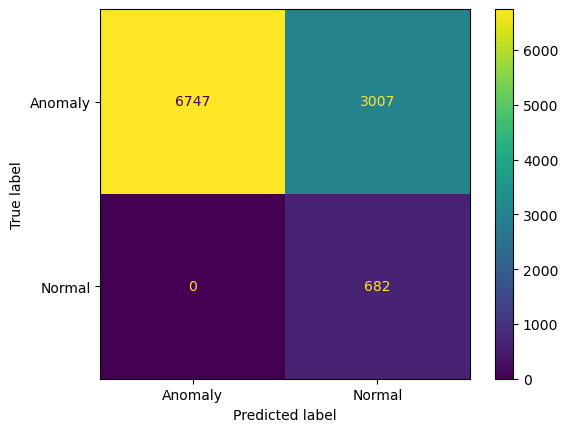

In [5]:

def anomaly_detection_isolation_forest():
    # Load the dataset
    data = pd.read_csv('US_Util_2020.csv')
    
    #convert all the values in the columns into numeric
    label_encoder = LabelEncoder()
    for column in data.select_dtypes(include=['object']).columns:
        data[column] = label_encoder.fit_transform(data[column])
    
    
    data = data.drop(['zip'], axis=1)
    
    data.info()
    X = data.drop('res_rate', axis=1)  # Assuming 'target' is the column name of the continuous target variable
    y_cont = data['res_rate']
    
    data = data.dropna(axis=0, inplace=True)
#     #convert all the values in the columns into numeric
#     for column in data.columns:
#         data[column] = pd.to_numeric(data[column], errors='coerce')

    y = np.where(y_cont > 0.2, 1, 0)  # Define `threshold` based on your domain knowledge
    
    selector = SelectKBest(f_classif, k=6)
    X_selected = selector.fit_transform(X, y)
    
    X_selected
    
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize and fit the Isolation Forest
    iso_forest = IsolationForest(contamination='auto', n_estimators=100, random_state=42)
    iso_forest.fit(X_train_scaled)
    
    # Predict on the test data
    y_pred = iso_forest.predict(X_test_scaled)
    # Convert predictions to match the original label (1 for normal, -1 for anomaly)
    y_pred = np.where(y_pred == 1, 0, 1)
    
    # Evaluate the model
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Use a confusion matrix for visualization of the outcome
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Anomaly', 'Normal'])
    disp.plot()
    plt.show()

# Example usage

anomaly_detection_isolation_forest()